In [72]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors

plt.style.use('matplotlib.mplstyle')

DATA_DIR = 'Data/'
data_name = 'summary.txt'

col_names = ['Step','t','M','LogL','LogR',
             'LogTs','LogTc','Logrhoc','logPc','psic',
             'Xc','Yc','XCc','XNc','XOc',
             'taudyn','tauKH','taunuc','Lpp','LCNO',
             'L3a','LZ','Lv','MHe','MC',
             'MO','RHe','RC','RO']

masses = np.array([0.1, 0.5, 1, 1.5, 2,
                   3, 5, 8, 10, 15,
                   20, 30, 50, 100])

metallicities = np.array([0.0001,0.0003,0.001,0.004,0.01,0.02,0.03])

lilac = np.array((200,162,200))/255

In [73]:
# Importing summary files and combining them into a single dataframe (i = 1)
dataframes = {}

for i,mass in enumerate(masses):
    # Only import second row (i = 1) 
    df = pd.read_csv(DATA_DIR+'3.2/'+f'{mass:.3g}M/'+'summary.txt',
                     delim_whitespace=True, header=None,
                     skiprows=1, nrows=1)
        
    dataframes[i] = df

# Combining individual dataframes
df = pd.concat(dataframes.values(), axis=0,
               ignore_index=True)

df.columns = col_names

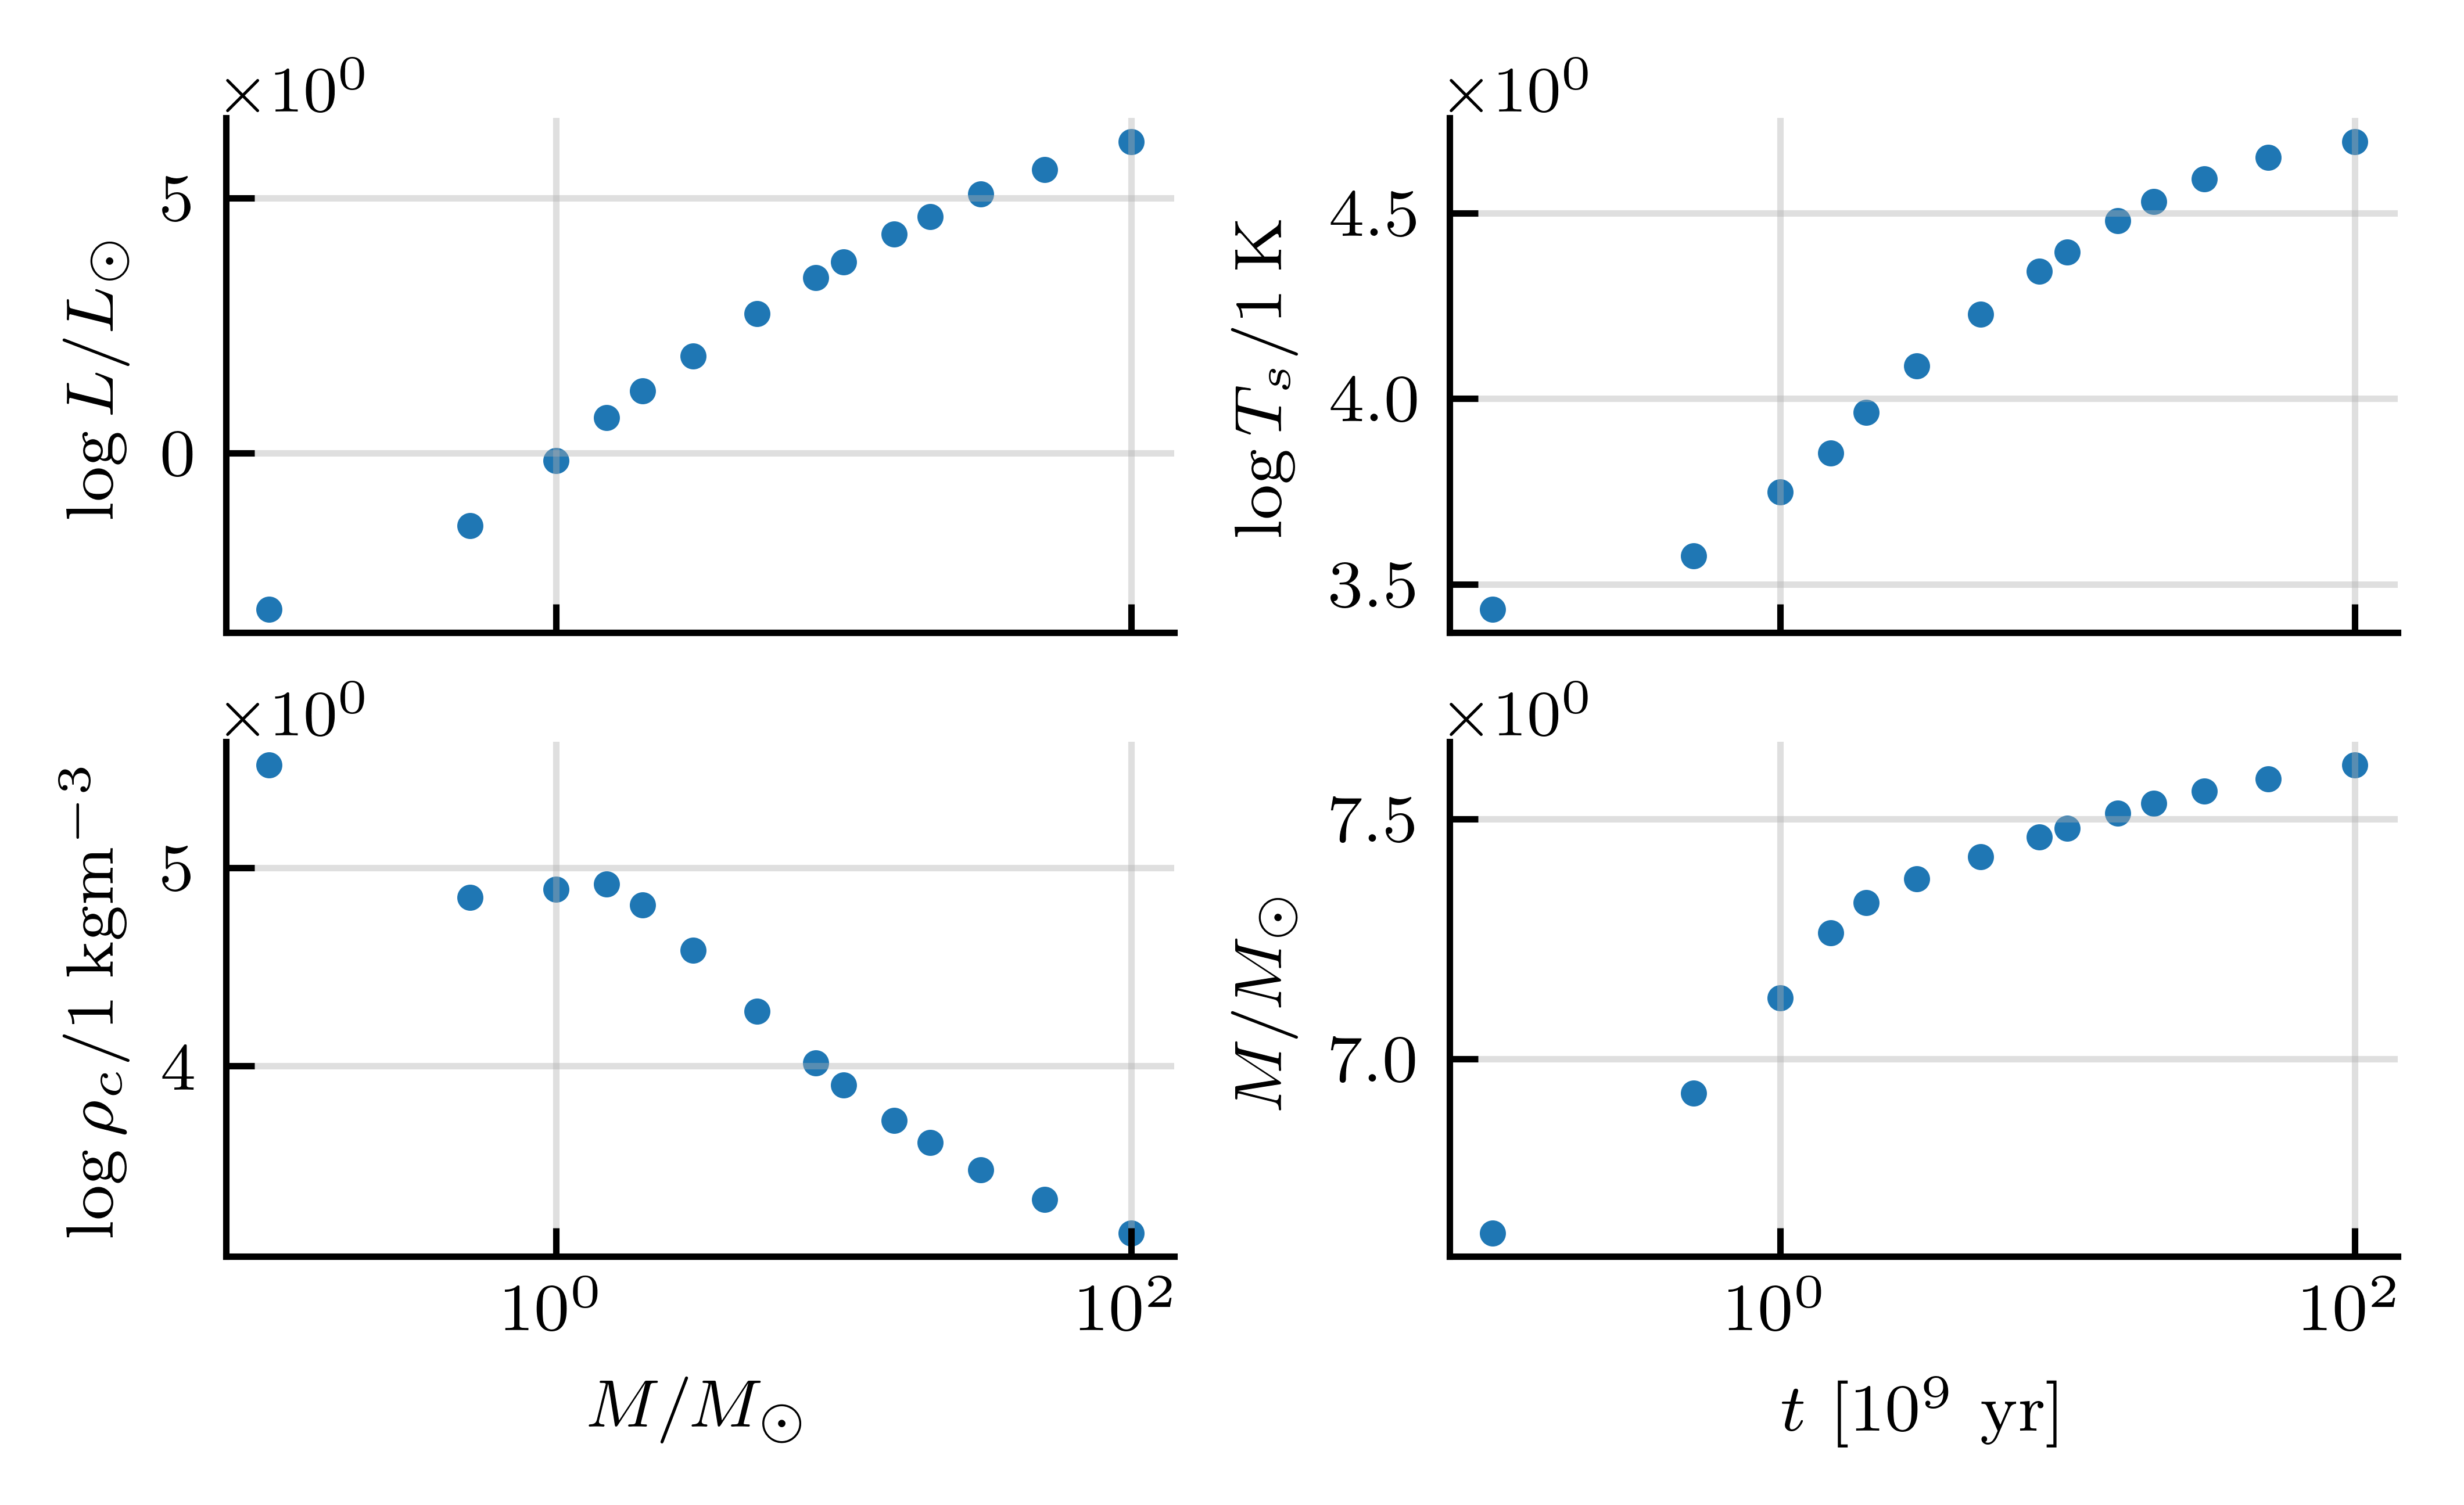

In [74]:
# Plotting M vs Tc, rhoc, L, Ts
from matplotlib.ticker import ScalarFormatter

plt.rcParams["axes.grid.axis"] ="y"
plt.rcParams["axes.grid"] = True

fig, axs = plt.subplots(2,2, sharex= True)
axs[0,0].scatter(df['M'],df['LogL'],s=5)
axs[0,0].set_ylabel(r"$\log L/L_\odot$")
axs[0,0].set_xscale('log')

axs[0,1].scatter(df['M'],df['LogTs'],s=5)
axs[0,1].set_ylabel(r"$\log T_s / 1 \: \mathrm{K}$")

axs[1,0].scatter(df['M'],df['Logrhoc'],s=5)
axs[1,0].set_xlabel(r"$M/M_\odot$")
axs[1,0].set_ylabel(r"$\log \rho_c / \mathrm{1 \: kg m^{-3}}$")

axs[1,1].scatter(df['M'],df['LogTc'],s=5)
axs[1,1].set_xlabel(r"$t \ [\mathrm{10^9 \ yr}]$")
axs[1,1].set_ylabel(r"$M/M_\odot$")

x_pos = 0.0
y_pos = 1.0
offset_text = r'$\times \mathrm{10^{0}}$'
horizontalalignment='left'
verticalalignment='bottom'

for ax in axs.flat:
    ax.yaxis.set_minor_formatter(ScalarFormatter(useMathText=True))
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.text(x_pos, y_pos, offset_text, transform=ax.transAxes,
                horizontalalignment=horizontalalignment,
                verticalalignment=verticalalignment, fontsize = 8)
    ax.grid(which='both', alpha=0.4, visible=True)

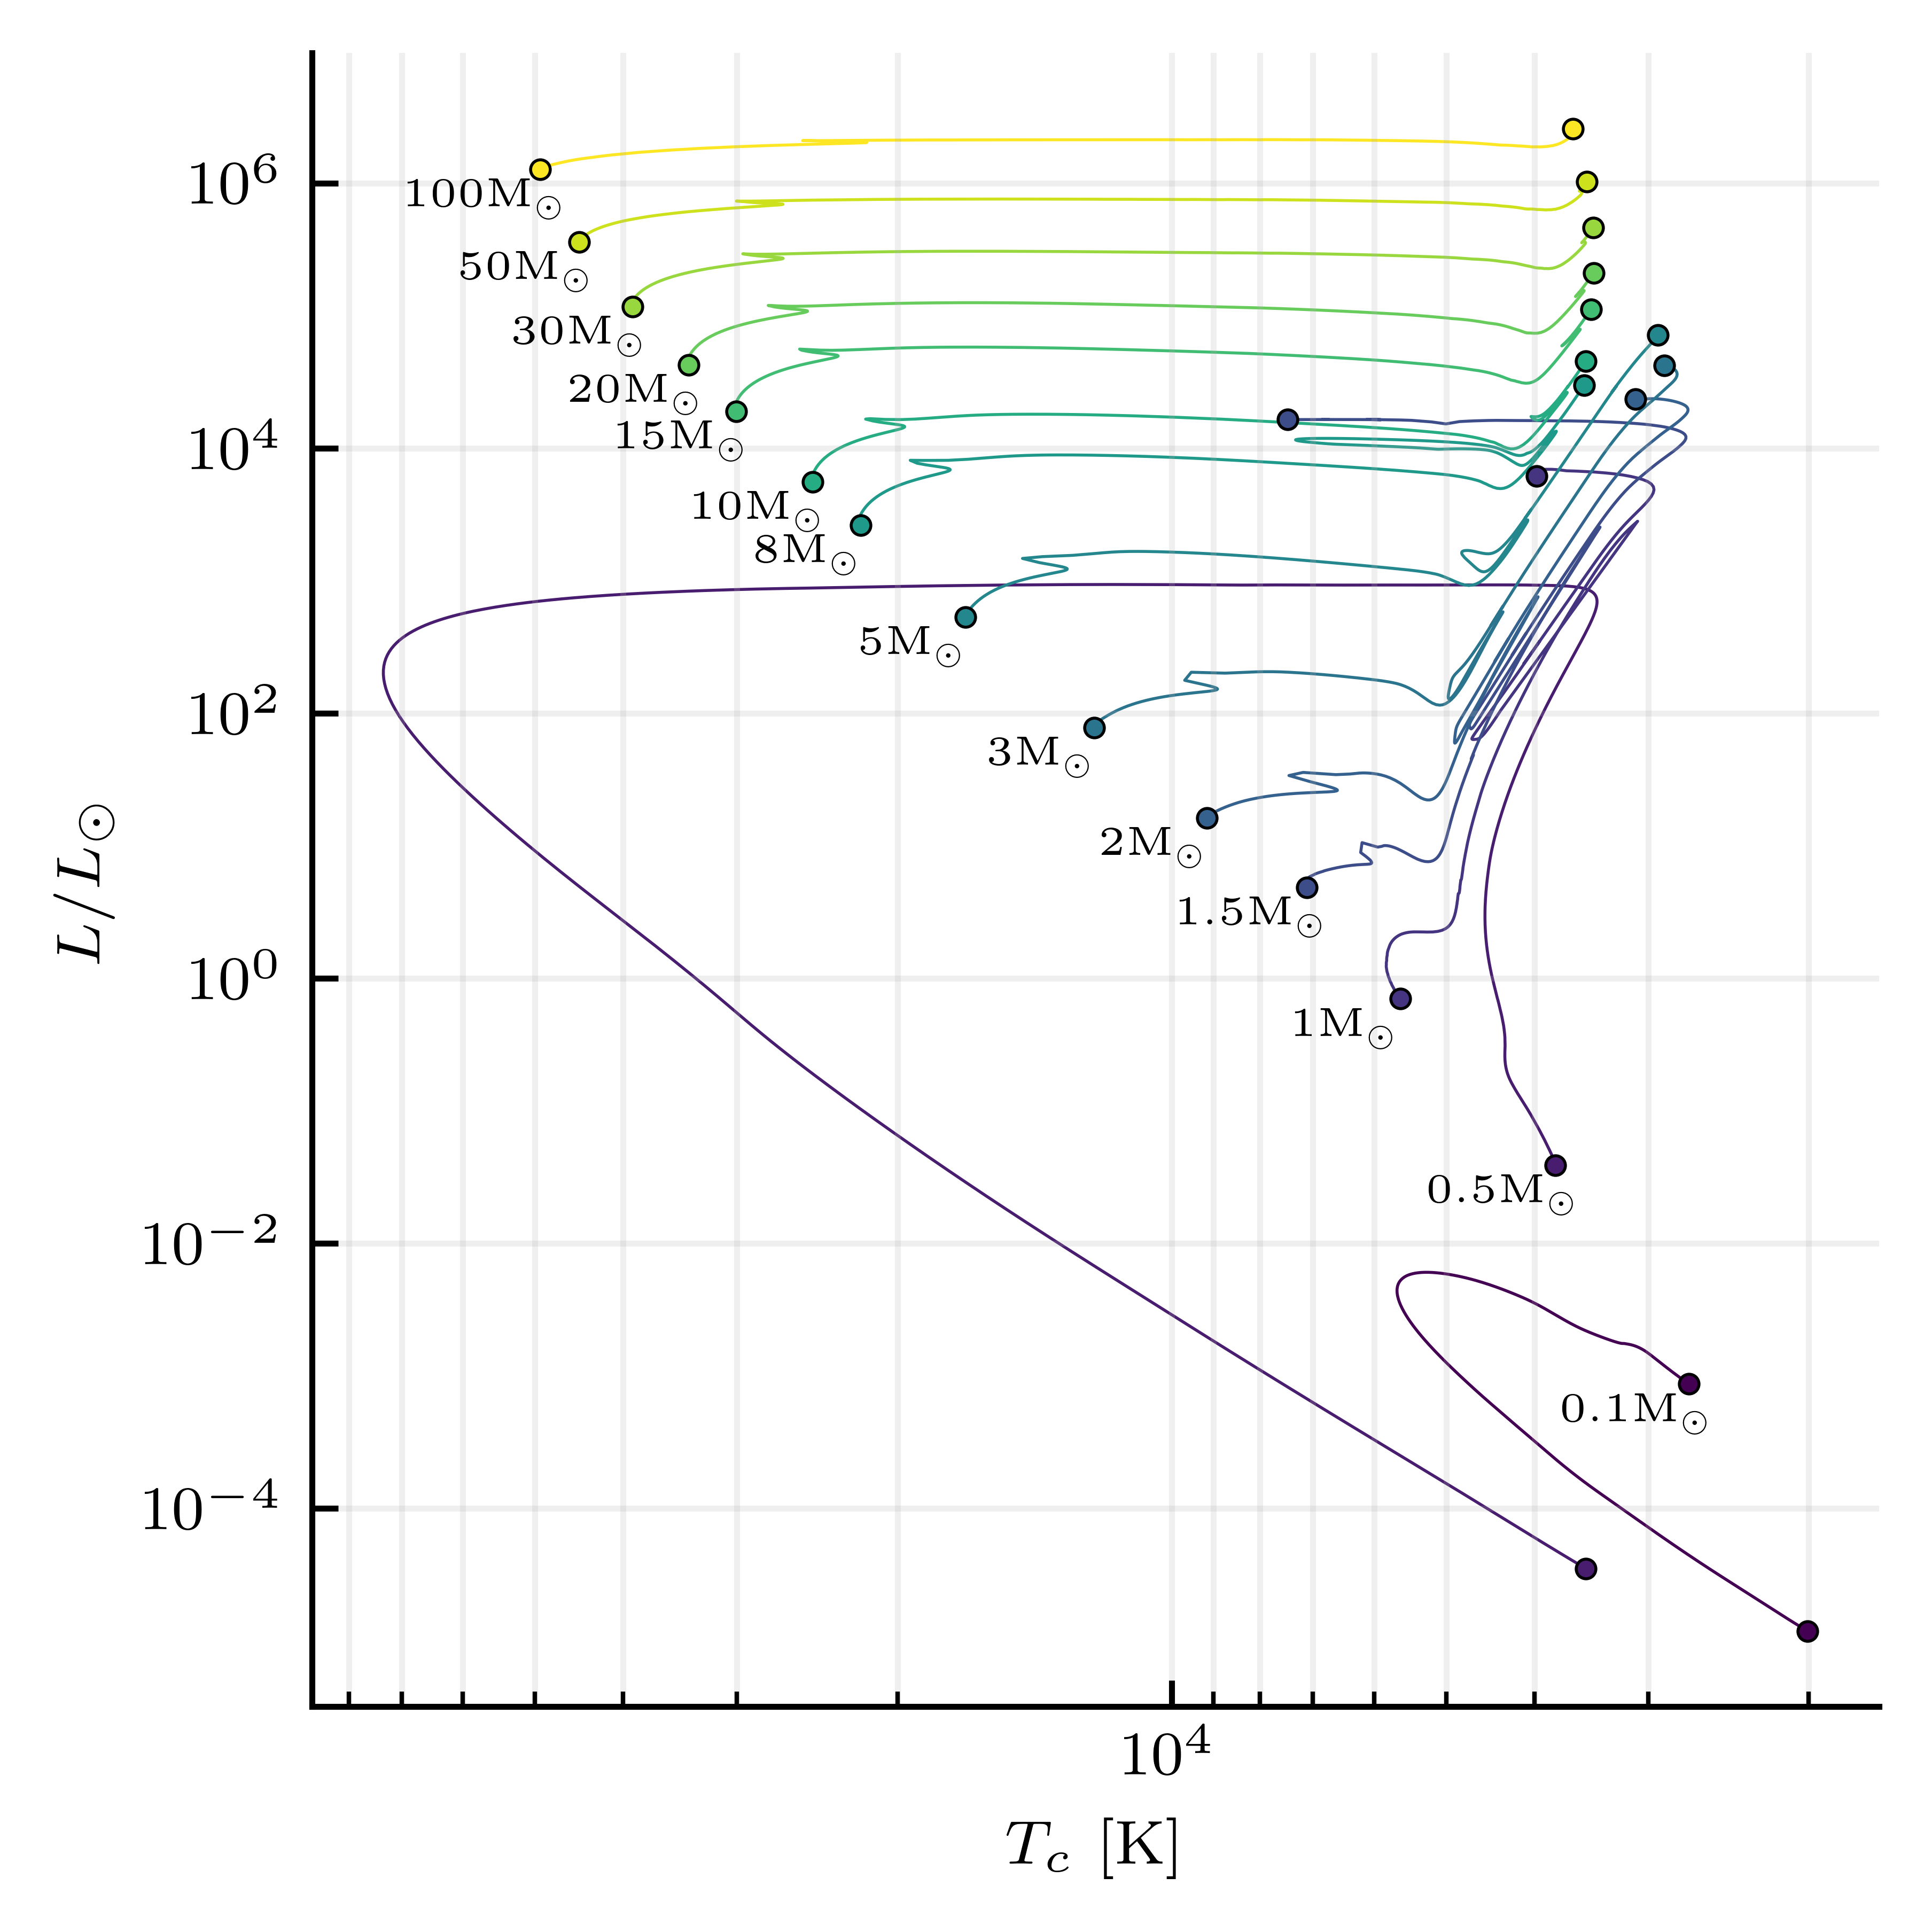

In [75]:
# HR diagram (metallicity constant)
def HR_plot(masses,distinct_styles=False,annotated=False):
    fig,ax = plt.subplots(figsize=(3.5,3.5))

    color_gradient = np.linspace(0,1,len(masses))

    cmap = cm.viridis
    norm = mcolors.Normalize(0,1)

    if distinct_styles == True:
        line_styles = np.array(['-',':','--','-.'])
        mark_styles = np.array(['o','^','s','d'])
    else:
        line_styles = np.array(['-'])
        mark_styles = np.array(['o'])


    for i,mass in enumerate(masses):
        # Import data
        df_mass = pd.read_csv(DATA_DIR+'3.2/'+f'{mass:.3g}M/summary.txt',
                delim_whitespace=True, header=None)
        df_mass.columns = col_names

        LogTs = 10**df_mass['LogTs']
        LogL  = 10**df_mass['LogL']

        color = cmap(norm(color_gradient[i]))

        # Plot time evolution
        ax.plot(LogTs,LogL,color=color, alpha=1, linewidth=0.4,
                zorder=1, linestyle=line_styles[i%len(line_styles)])

        ax.scatter([LogTs[0],LogTs.iloc[-1]],[LogL[0],LogL.iloc[-1]], s=7, zorder=2,
                   marker=mark_styles[i%len(mark_styles)], color=color,
                   edgecolors='k', linewidth=0.4)
        
        if annotated==True:
            ax.annotate(f'{mass:.3g}'+r'$\mathrm{M_\odot}$', (LogTs[0],LogL[0]),
                        textcoords="offset points", xytext=(-7,-5), ha='center', fontsize=5.5)

    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.xaxis.set_inverted(True)

    ax.set_xlabel(r'$T_c \ [\mathrm{K}]$')
    ax.set_ylabel(r'$L / L_\odot$')

    #cbar_ax = fig.add_axes([1., 0.2, 0.03, 0.7])  
    #cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, extend = "both", aspect = 0.8)
    #cbar.set_label(r'$t/t_\mathrm{end}$')

    ax.grid(which='both', alpha=0.2, visible=True)


HR_plot(masses,annotated=True)

C:\Users\beepp\AppData\Local\Temp\ipykernel_23508\2618147038.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, extend = "both", aspect = 0.8)
C:\Users\beepp\AppData\Local\Temp\ipykernel_23508\2618147038.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, extend = "both", aspect = 0.8)


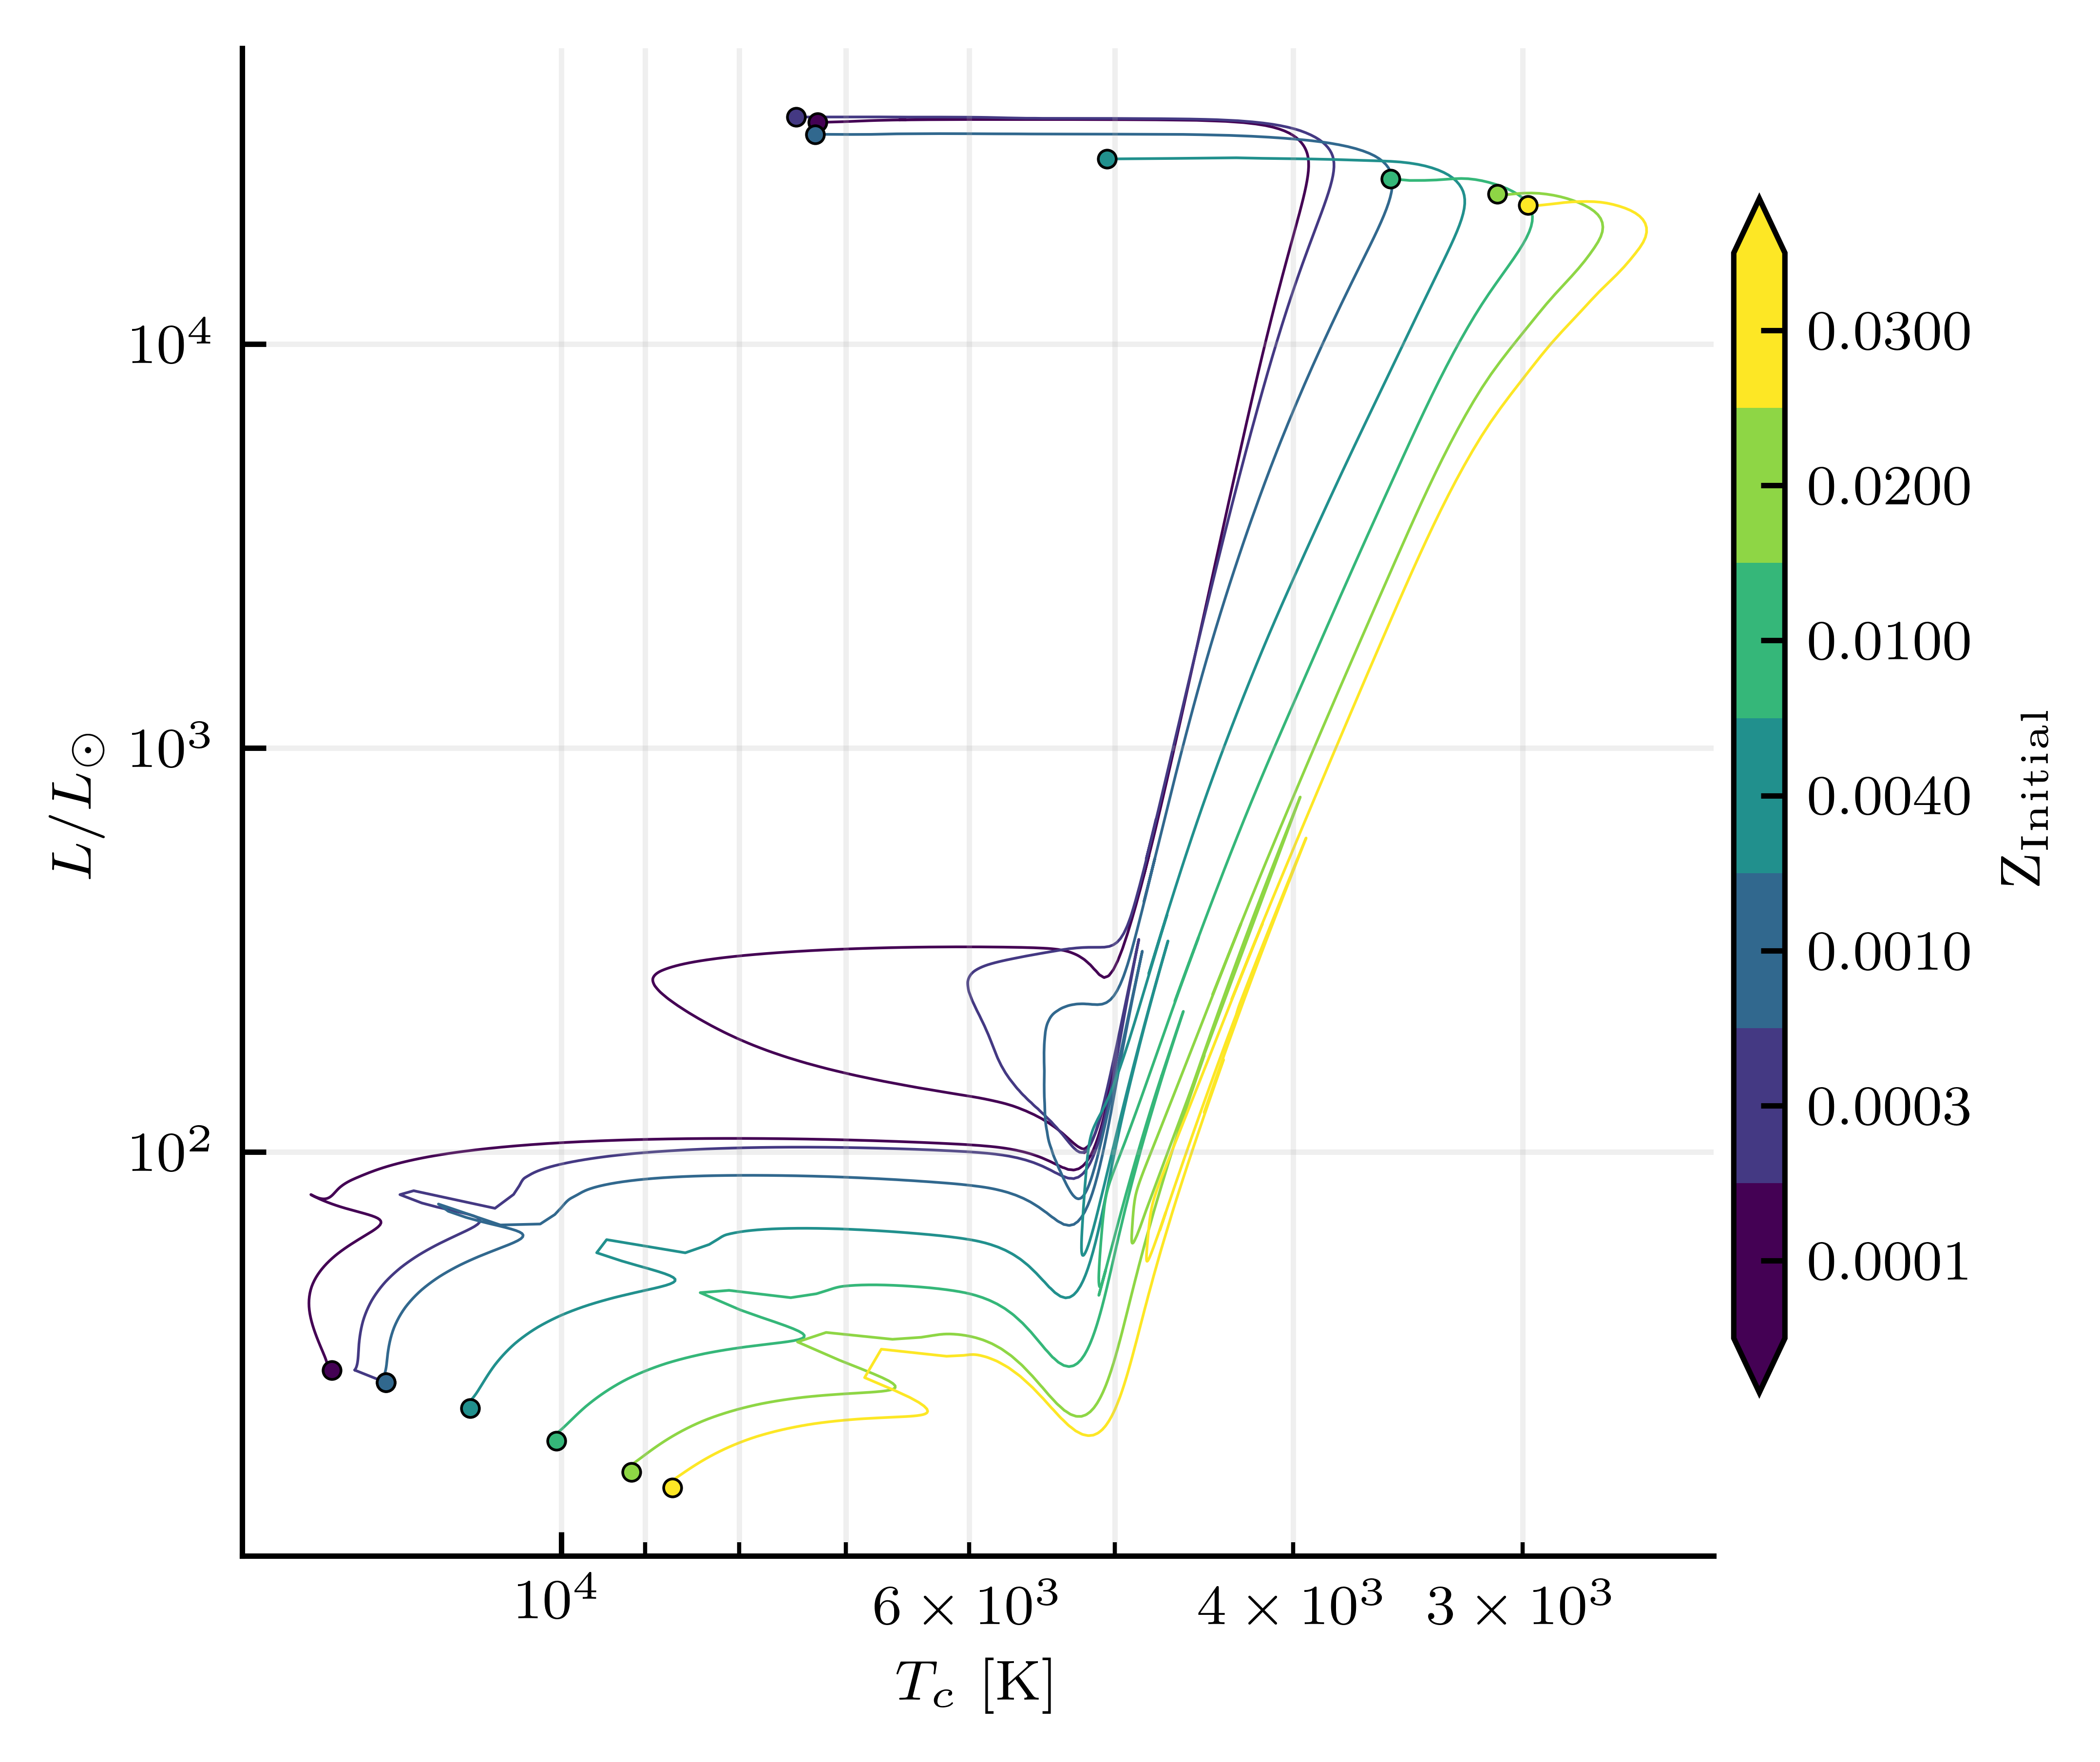

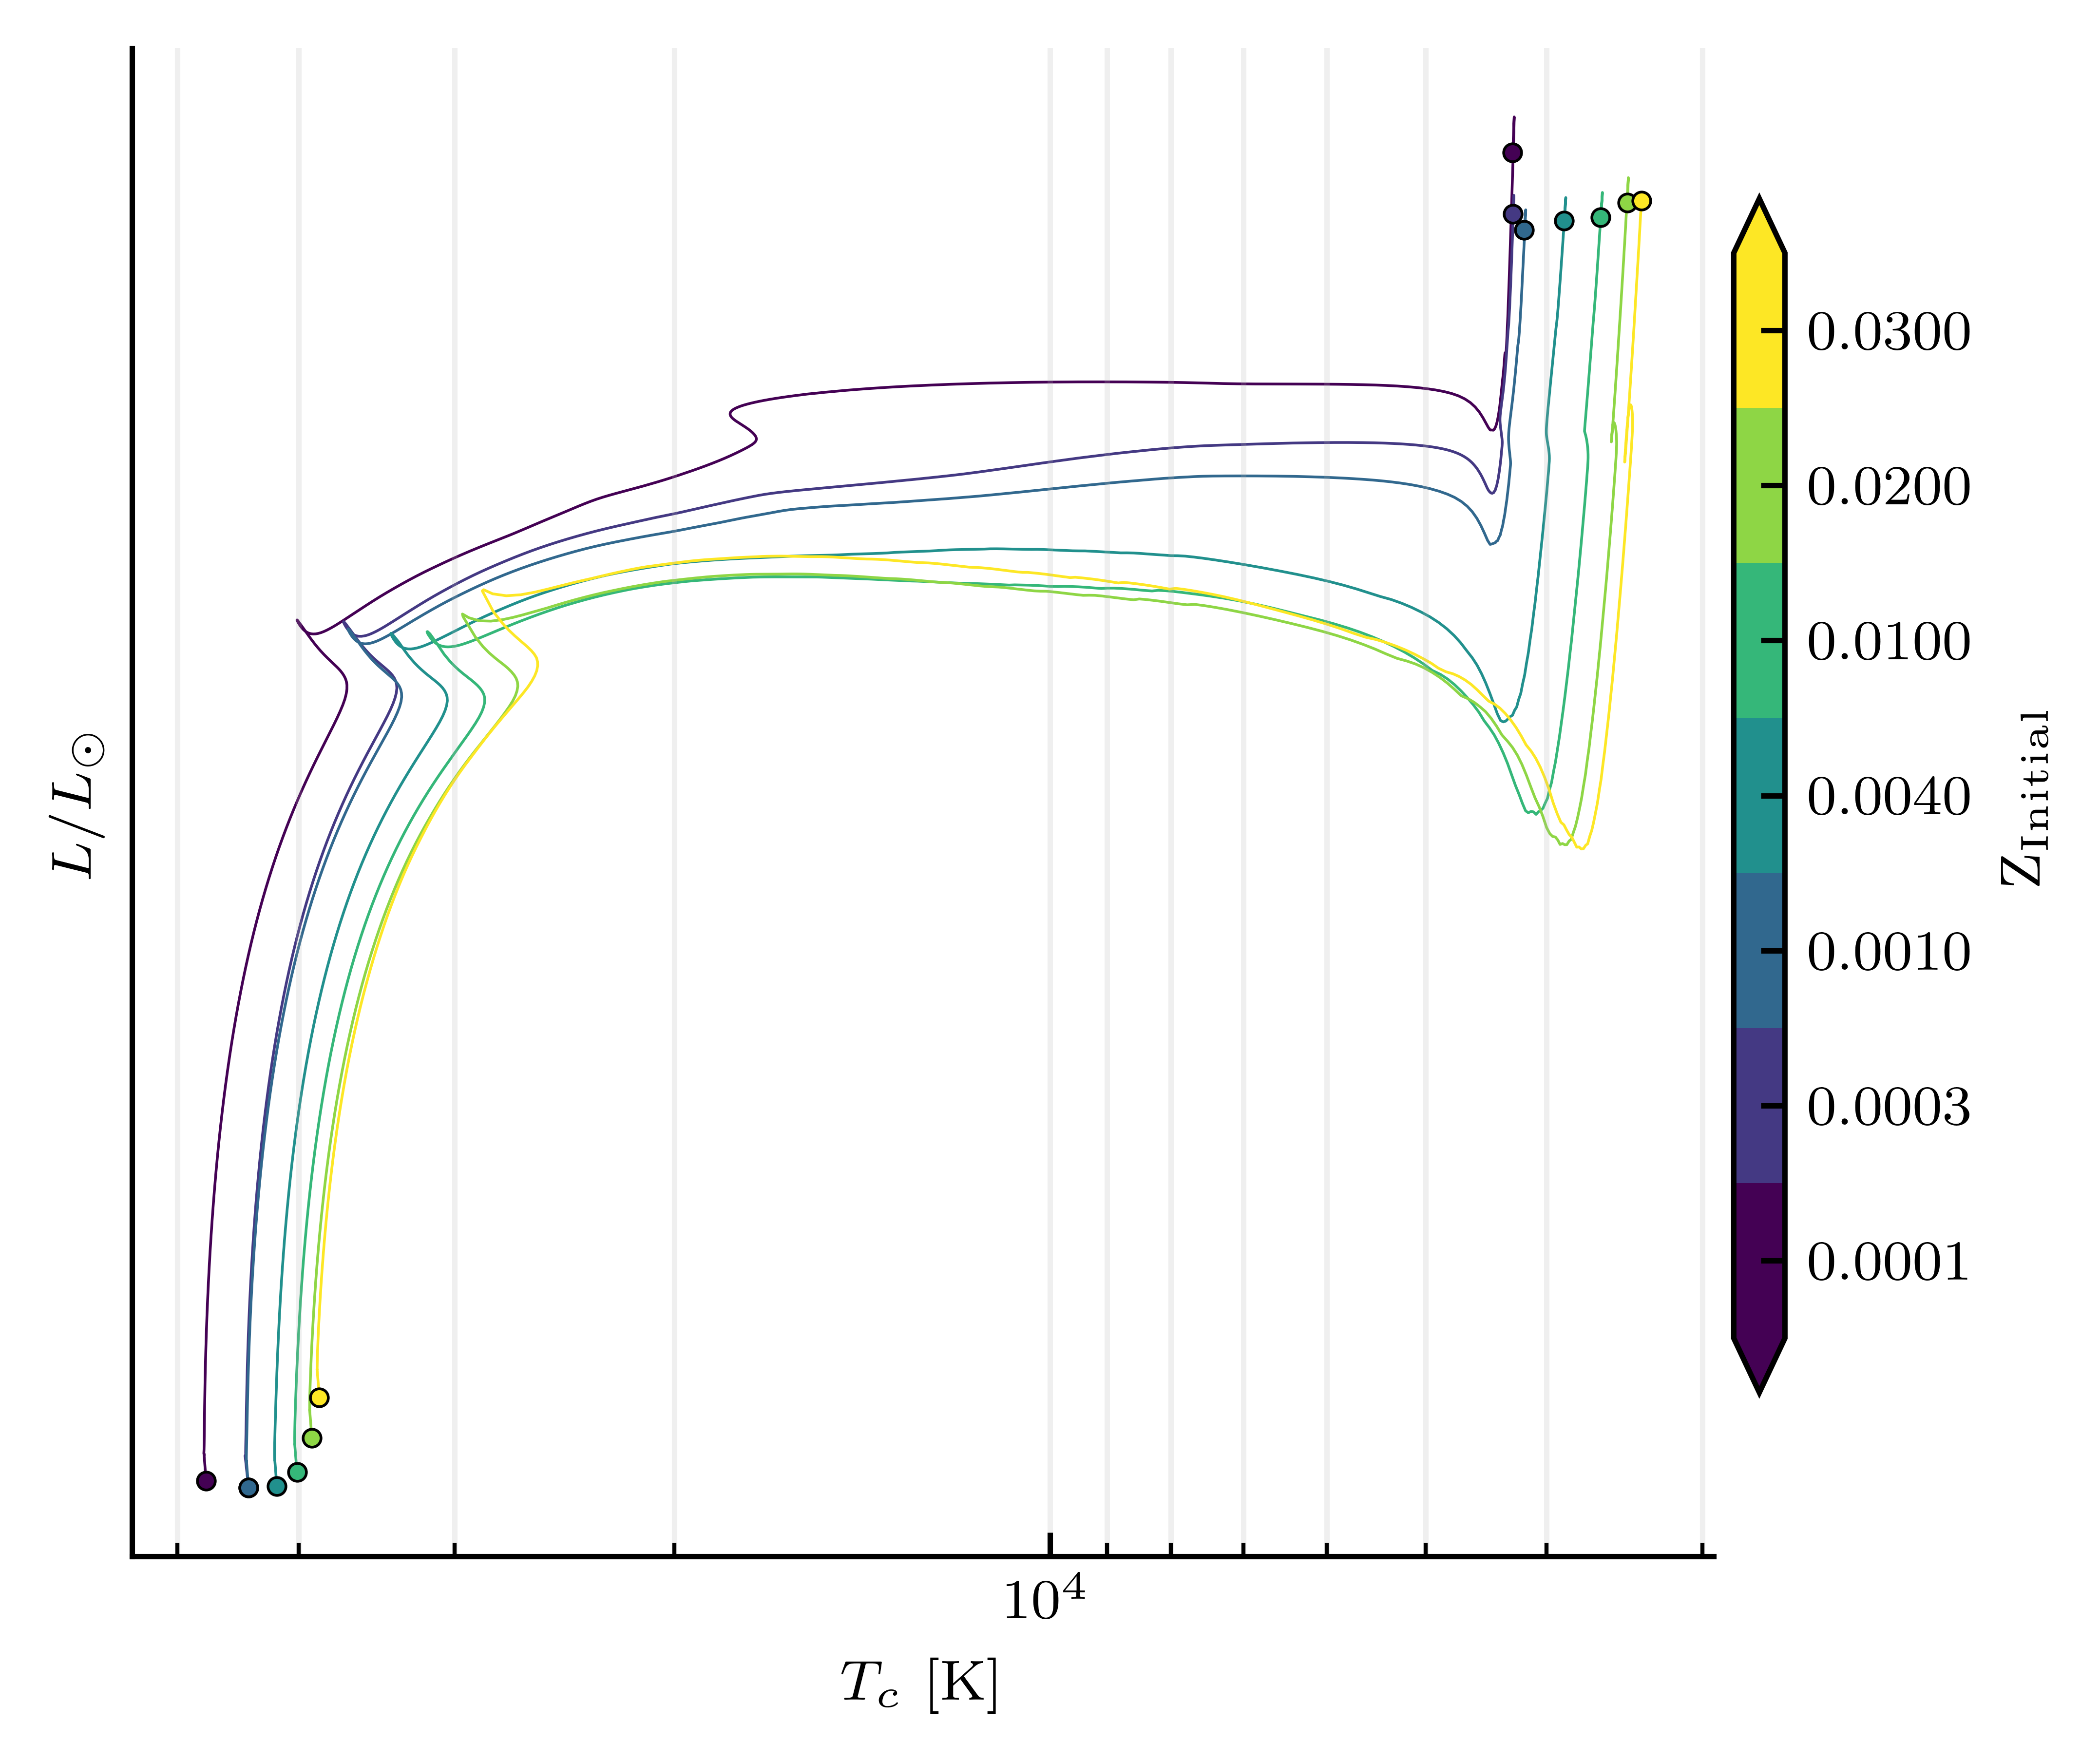

In [76]:
# HR diagram (varying metallicity)

def HR_plot_metal(metal):

    for M in [2,30]:
        fig,ax = plt.subplots(figsize=(3.5,3.5))

        # Create discrete colors 
        cmap = cm.viridis
        norm = mcolors.BoundaryNorm(metal,cmap.N)
        boundaries = np.concatenate(([metal[0] - (metal[1] - metal[0]) / 2], 
                                     (metal[:-1] + metal[1:]) / 2, 
                                     [metal[-1] + (metal[-1] - metal[-2]) / 2]))
        midpoints = (boundaries[:-1] + boundaries[1:]) / 2
        norm = mcolors.BoundaryNorm(boundaries, cmap.N)

        for i,Z in enumerate(metal):
            # Import data
            df_Z = pd.read_csv(DATA_DIR+f'{M:.3g}M_{Z:.3g}/summary.txt',
                               delim_whitespace=True, header=None)
            df_Z.columns = col_names

            color = cmap(norm(metal[i]))

            LogTs = 10**df_Z['LogTs']
            LogL  = 10**df_Z['LogL']

            # Time evolution
            ax.plot(LogTs,LogL,color=color, alpha=1, linewidth=0.4, zorder=1)
            
            ax.scatter([LogTs[0],LogTs.iloc[-1]],[LogL[0],LogL.iloc[-1]],
                        s=7, zorder=2, edgecolors='k', linewidth=0.4,
                        color=color)

        ax.set_yscale('log')
        ax.set_xscale('log')

        ax.xaxis.set_inverted(True)

        ax.set_xlabel(r'$T_c \ [\mathrm{K}]$')
        ax.set_ylabel(r'$L / L_\odot$')
        #ax.set_yticks(10**np.array([1,2,3,4,5,6]))
        ax.yaxis.set_minor_locator(plt.NullLocator())

        cbar_ax = fig.add_axes([1., 0.2, 0.03, 0.7])  
        cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, extend = "both", aspect = 0.8)
        cbar.set_ticks(midpoints)
        cbar.set_ticklabels(f'{Z:.4f}' for Z in metal)
        cbar.set_label(r'$\mathrm{Z_{Initial}}$')

        ax.grid(which='both', alpha=0.2, visible=True)
        #ax.set_ylim([1e-4,3e6])
        #ax.set_xlim([2500,6e4])

        ax.xaxis.set_inverted(True)

metal = np.array([0.0001,0.0003,0.001,0.004,0.01,0.02,0.03])
HR_plot_metal(metal)

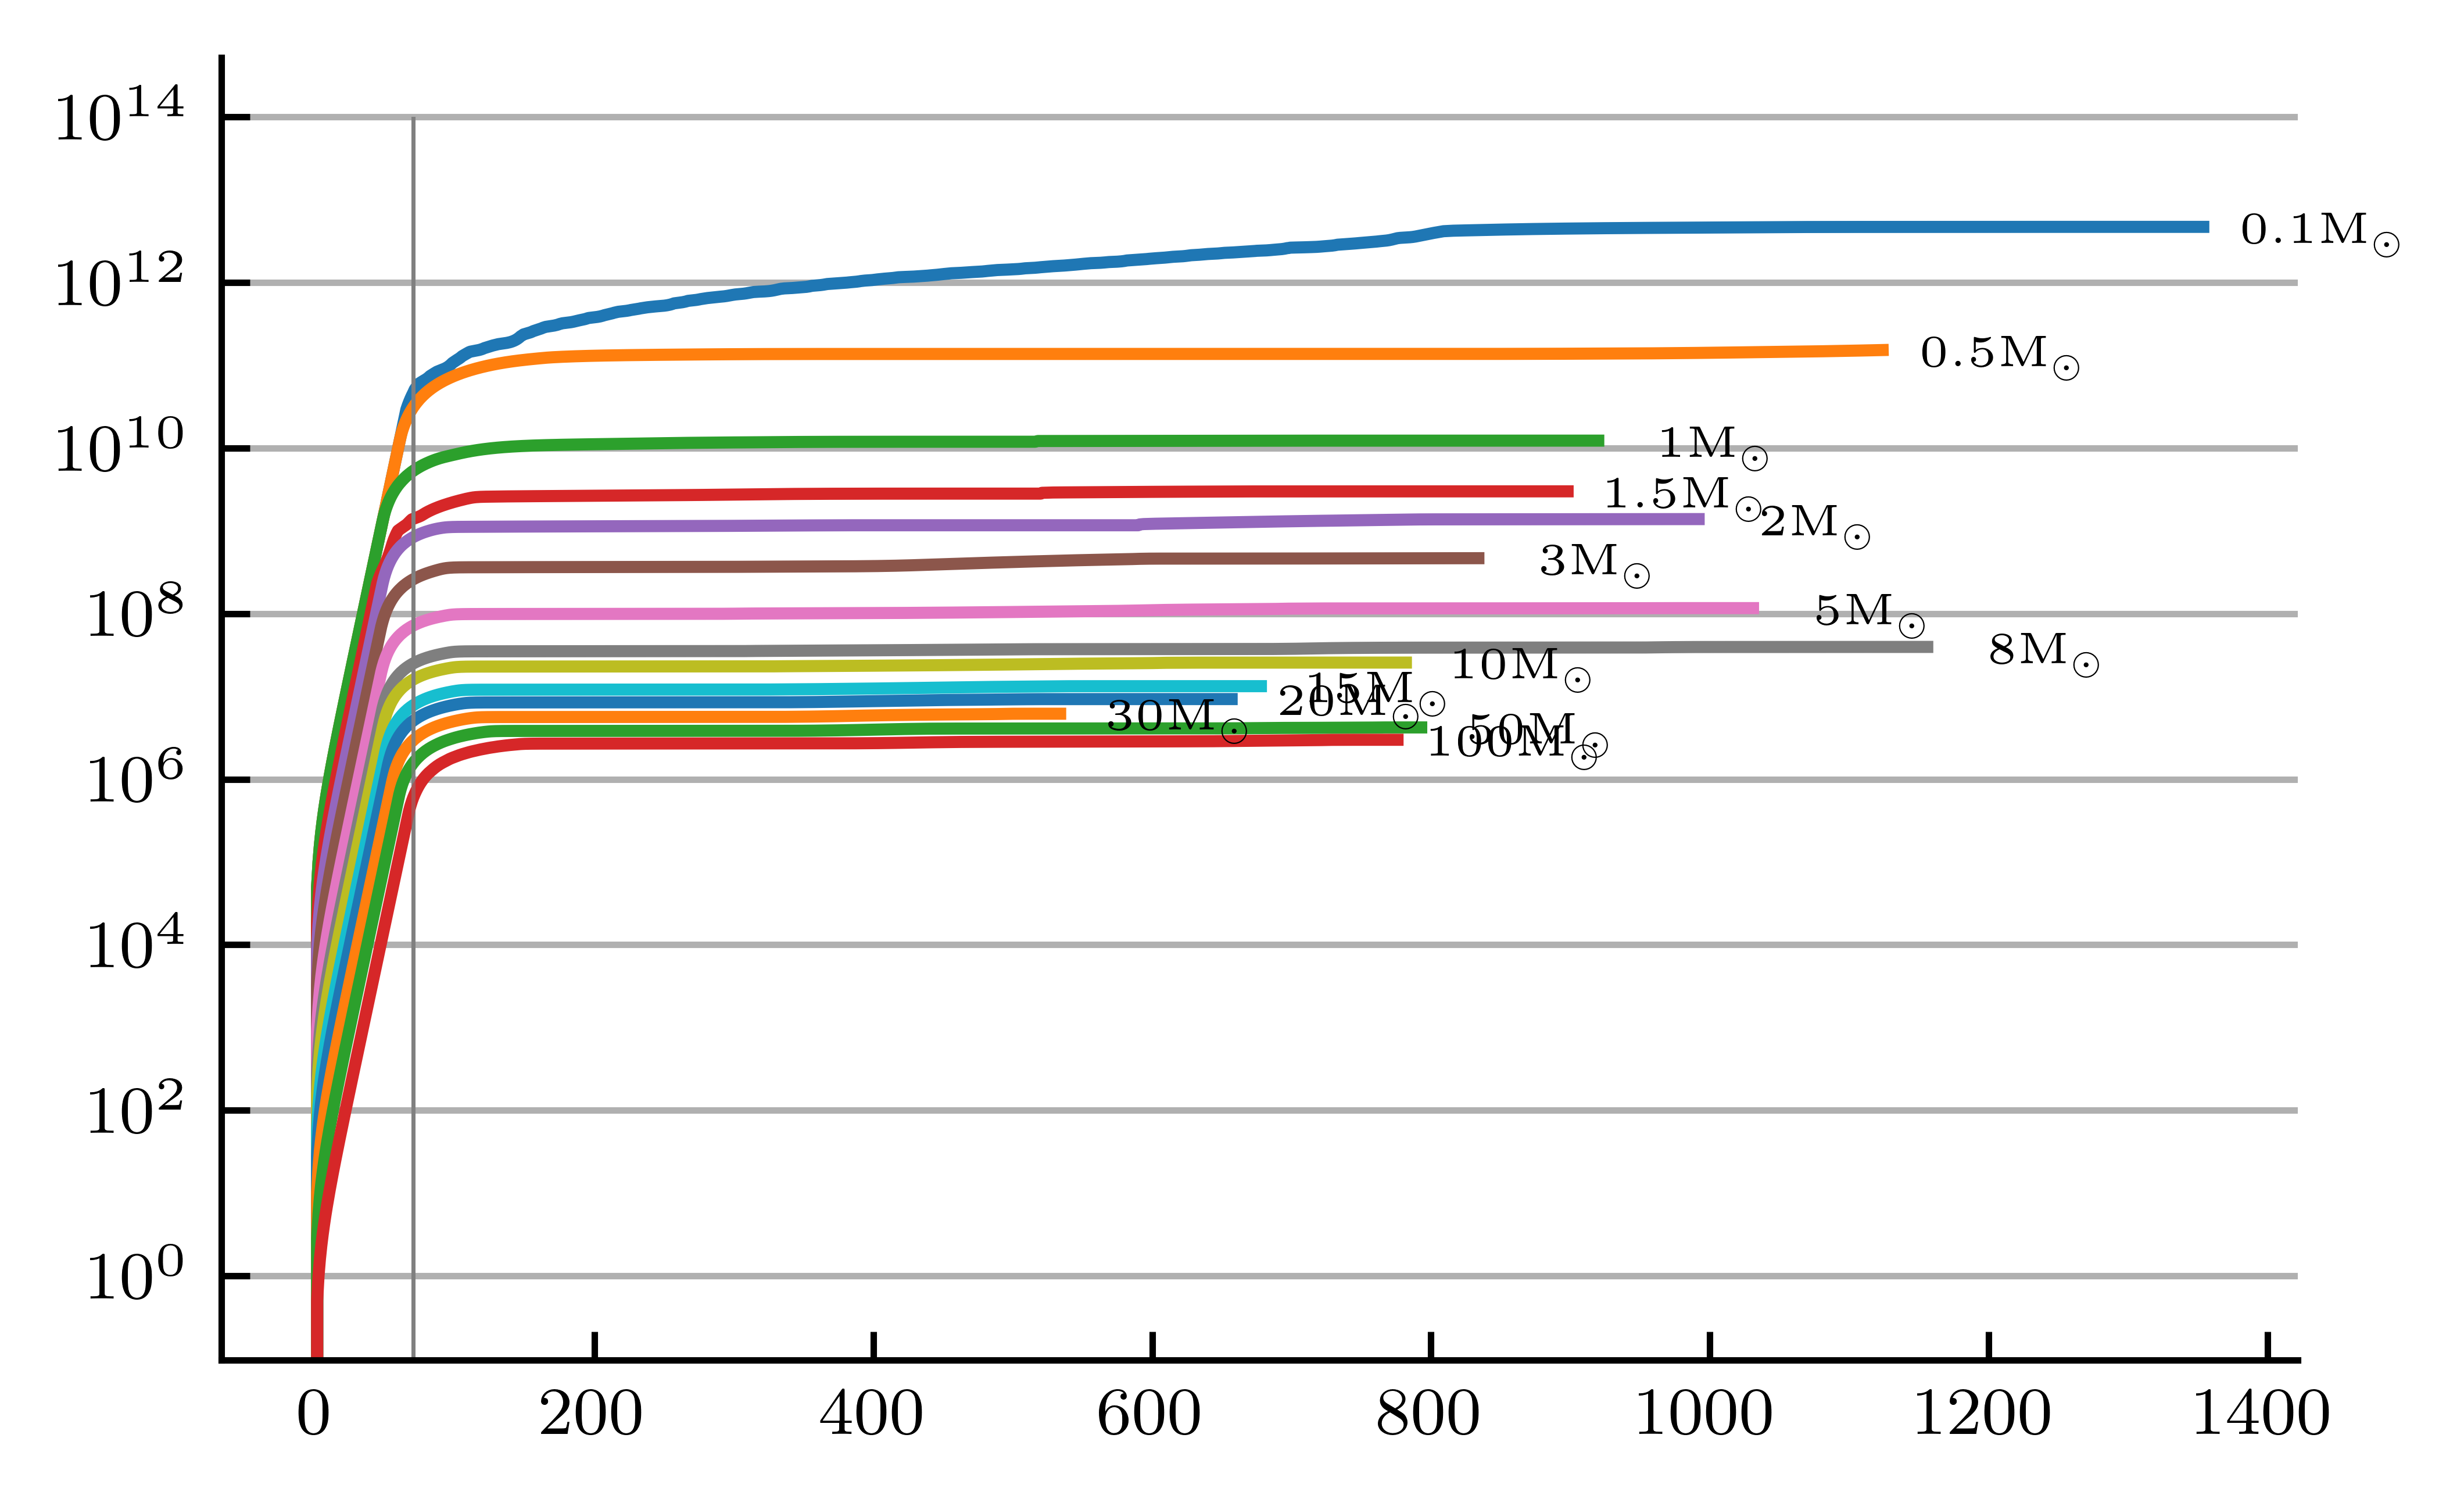

In [77]:
# steps vs time overview
fig,ax = plt.subplots()

for i,mass in enumerate(masses):
    df_time = pd.read_csv(DATA_DIR+'3.2/'+f'{mass:.3g}M/summary.txt',
                delim_whitespace=True, header=None)
    df_time.columns = col_names
    ax.semilogy(df_time['Step'],df_time['t'])
    ax.annotate(f'{mass:.3g}'+r'$\mathrm{M_\odot}$',
                        (np.array(df_time['Step'])[-1],np.array(df_time['t'])[-1]),
                        textcoords="offset points", xytext=(15,-2), ha='center', fontsize=5.5)
    
    ax.vlines(x=[70],ymin=0,ymax=10e13,
              linewidth=0.5,color='gray',alpha=0.5)
    

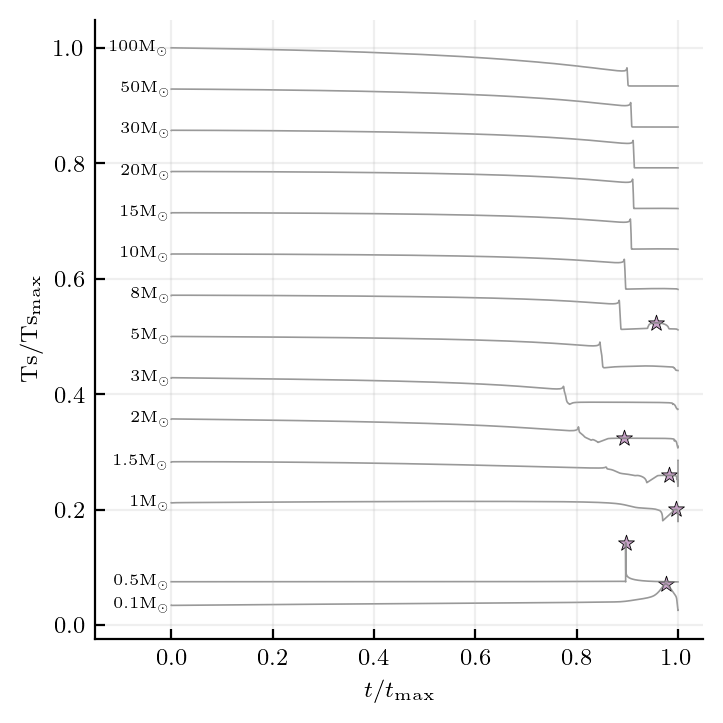

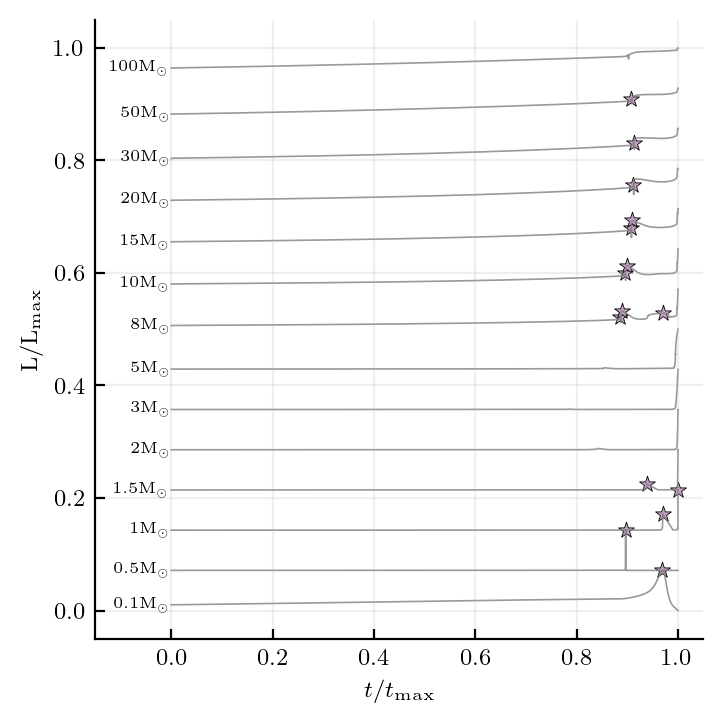

In [78]:
# Time vs Tc and L
from scipy.signal import find_peaks

def peak_t(y):
    h = (max(y)-min(y))
    peaks, _ = find_peaks(y,prominence=0.1)

    return peaks

def t_v_Tc_L_plots(masses,log_t=False,annotated=False):

    for i,quantity in enumerate(['LogTs','LogL']):

        fig,ax = plt.subplots(figsize=(3.5,3.5),dpi=200)

        for j,mass in enumerate(masses):

            # Import data
            df_mass = pd.read_csv(DATA_DIR+'3.2/'+f'{mass:.3g}M/summary.txt',
                    delim_whitespace=True, header=None)
            df_mass.columns = col_names

            y_temp = 10**df_mass[quantity]/max(10**df_mass[quantity])
            y = ((10**df_mass[quantity])/max(10**df_mass[quantity])+j)/len(masses) # Normalized and elevated by j to prevent overlap
            y_annotate = min(y) + (max(y)-min(y))/2 # y-value for annotation, ignore

            # Plot time evolution
            if log_t == True:
                t = df_mass['t']
                peak_idx = peak_t(y_temp)
                ax.scatter(t[peak_idx],y[peak_idx], color=lilac, marker='*', linewidths=0.3, edgecolors='k')

                ax.plot(t, y, c='gray', alpha=0.8, linewidth=0.6, zorder=1)
                ax.set_xscale('log')
                ax.set_xlabel(r'$t \ \mathrm{[Yr]}$')
                
                if annotated==True:
                    ax.annotate(f'{mass:.3g}'+r'$\mathrm{M_\odot}$',
                                (max(t)*1.3,y_annotate),
                                textcoords="offset points", xytext=(1,0),
                                ha='left', va='center', fontsize=5.5)

            elif log_t == False:
                t = df_mass['t']/max(df_mass['t'])
                peak_idx = peak_t(y_temp)
                ax.scatter(t[peak_idx],y[peak_idx], color=lilac, marker='*', linewidths=0.3, edgecolors='k')

                ax.plot(t, y, c='gray', alpha=0.8, linewidth=0.6, zorder=1)
                ax.set_xlim([-.15,1.05])
                ax.set_xlabel(r'$t/t_\mathrm{max}$')
                
                if annotated==True:
                    ax.annotate(f'{mass:.3g}'+r'$\mathrm{M_\odot}$',
                                (0,y[0]), textcoords="offset points", xytext=(-.1,0),
                                ha='right', va='center', fontsize=5.5)
            
            ax.set_ylabel(f'{quantity[3:]}/{quantity[3:]}'+r'$_\mathrm{max}$')

            ax.grid(which='both', alpha=0.2, visible=True)

t_v_Tc_L_plots(masses,log_t=False,annotated=True)
